**Responsibilities**



*   EDA - Anupriya and Shama
*   Coding - Abhinav and Shruti


*   References and Details - Anisha and Surendra Sir


Aspect Extraction sample code will be managed by Anupriya








**Things to do**


*   Detailed Cleaning of review_cleaned
*   lexicon based polarity once the reviews are cleaned


*   Testing the lexicon based polarity with recommended to find out the accuracy (Logistic Regression)
*   General EDA using Tableau on the final dataset exported from python file (Create dashboard)


*   Coding for aspect extraction by supervised learning
*   Verification of aspects using various classification algorithms - Naive Bayes, Random Forest, KNN, Linear SVC


*   Analysis based on aspects
*   Overall Analysis












**Loading the Dataset**

In [37]:
import pandas as pd
import string
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import numpy as np

In [38]:
df = pd.read_excel('capstone_airline_reviews3.xlsx')

In [39]:
df.shape

(131895, 17)

In [40]:
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [41]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#### Since the first 5 rows show alternate blank rows, deleting all the rows where all elements are missing
df = df.dropna(how='all')
df.shape

(65947, 17)

In [43]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [44]:
#### Resetting Index
df.reset_index(inplace = True) 

In [45]:
df.head()

,index,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
2,5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
3,7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [46]:
#### Find null values in our dataset
round(100*(df.isnull().sum() / len(df.index)),2)

index               0.00
airline             0.00
overall             2.93
author              0.00
review_date         0.00
customer_review     0.00
aircraft           70.10
traveller_type     39.72
cabin               4.01
route              39.76
date_flown         39.90
seat_comfort        7.99
cabin_service       7.93
food_bev           20.23
entertainment      32.99
ground_service     40.32
value_for_money     2.99
recommended         2.29
dtype: float64

In [47]:
#### Dropping the columns aircraft, route, date_flown as columns not needed
df = df.drop(['aircraft', 'route', 'date_flown'], axis=1)


In [48]:
round(100*(df.isnull().sum() / len(df.index)),2)

index               0.00
airline             0.00
overall             2.93
author              0.00
review_date         0.00
customer_review     0.00
traveller_type     39.72
cabin               4.01
seat_comfort        7.99
cabin_service       7.93
food_bev           20.23
entertainment      32.99
ground_service     40.32
value_for_money     2.99
recommended         2.29
dtype: float64

In [49]:
#### Dropping blank values for recommended
df.dropna(subset = ["recommended"], inplace = True)

In [50]:
round(100*(df.isnull().sum() / len(df.index)),2)

index               0.00
airline             0.00
overall             2.96
author              0.00
review_date         0.00
customer_review     0.00
traveller_type     38.31
cabin               1.77
seat_comfort        5.83
cabin_service       5.78
food_bev           18.36
entertainment      31.42
ground_service     38.92
value_for_money     0.72
recommended         0.00
dtype: float64

In [51]:
df.shape

(64440, 15)

In [52]:
df.head()

,index,airline,overall,author,review_date,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
2,5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
3,7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


In [53]:
#### Change recommended value from yes/no to 0/1
df['recommended'] = df['recommended'].map({'yes': 1, 'no': 0})

In [54]:
df.head()

,index,airline,overall,author,review_date,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1
1,3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,0
2,5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,0
3,7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,1
4,9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,0


**Cleaning Text Data for customer_review**

In [55]:
#### Take a look at some reviews
for index,text in enumerate(df['customer_review'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 âœ… Trip Verified | Venice to Ankara via Istanbul. Instead of taking off on time the fight was originally delayed (on the information table was written 10 minutes). I was satisfied with the information (it is possible to be delayed). The next information which followed invited us to go to the gate. More than 75% of passengers created the line in front of the desk and we were waiting for opening the gate. It was the first mistake, after 45 minutes the staff changed the departure time on the information desk for 10.50 a.m. Nobody knew that the game was started. The plane was delayed by more than 60 minutes. It is usually that the staff will give you any additional information about the connection flights. Unfortunately, it is not the case of Turkish Airlines . After the arrival, I run from the plane through the tunnel in the terminal and hoped to catch the flight to Ankara. The guy who was wearing the TA uniform and who was waiting at the end of the tunnel showed me the direct



*   **Expand Contractions**




In [56]:
####    Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [57]:
import re

#### Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

#### Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

In [58]:
#### Expanding Contractions in the reviews
df['review_processed']=df['customer_review'].apply(lambda x:expand_contractions(x))



*   **Remove Unwanted Elements**

In [59]:
import re
def preprocessor(text):
  text = re.sub('<[^>]*>', '', text)    #### Remove HTML Elements
  emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)    #### Identify Emoticons
  text = re.sub('[\W]+', ' ', text.lower()) +\
  ' '.join(emoticons).replace('-', '')#### Lowercase Reviews
  text = re.sub('\w*\d\w*','', text)    #### Remove digits and word containing digits
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)    #### string.punctuations function contains all the punctuations 
  #### and we use regular expressions to search them in the text and remove them
  text = re.sub(' +',' ',text)    #### Remove extra spaces
  return text

In [60]:
#### Check first 10 verbatims
df['review_processed'].head(10)

0    âœ… Trip Verified | London to Izmir via Istanb...
1    âœ… Trip Verified | Istanbul to Bucharest. We ...
2    âœ… Trip Verified | Rome to Prishtina via Ista...
3    âœ… Trip Verified | Flew on Turkish Airlines I...
4    âœ… Trip Verified | Mumbai to Dublin via Istan...
5    âœ… Trip Verified | Istanbul to Budapest via D...
6    âœ… Trip Verified | Istanbul to Algiers, plann...
7    âœ… Trip Verified | Basel to Cape Town via Ist...
8    Not Verified | Abu Dhabi to Luxembourg via Ist...
9    âœ… Trip Verified | The experience with Turkis...
Name: review_processed, dtype: object

In [61]:
#### Third Verbatim after adding processor function
preprocessor(df.loc[2, 'review_processed'])

'âœ trip verified rome to prishtina via istanbul i flew with this company several times in the past years and i can honestly say that it is getting worse and worse i flew from rome to prishtina via istanbul all flights had a delay which apparently is pretty normal with turkish the ground staff is for the most part useless in istambul i have tried to ask a few information about a flight delay i had just minutes before the connecting flight and the whole answer was relax sir no problem sir it is okay the new airport is a gigantic mess very big and disorganized when you land in istanbul it takes about to minutes taxiing and other minutes before they actually start disembarking it is an exhausting experience especially if you are in a hurry forget about asking for some indication at the new airport they all chat between each other some with a coffee in their hands i flew with four different aircraft on this trip two were fairly new the other two were old seats worn food on board was of ver

In [62]:
#### Apply preprocessor function to entire dataset
df['review_processed'] = df['review_processed'].apply(preprocessor)

In [63]:
#### Look how our text appears after cleaning
for index,text in enumerate(df['review_processed'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 âœ trip verified venice to ankara via istanbul instead of taking off on time the fight was originally delayed on the information table was written minutes i was satisfied with the information it is possible to be delayed the next information which followed invited us to go to the gate more than of passengers created the line in front of the desk and we were waiting for opening the gate it was the first mistake after minutes the staff changed the departure time on the information desk for a m nobody knew that the game was started the plane was delayed by more than minutes it is usually that the staff will give you any additional information about the connection flights unfortunately it is not the case of turkish airlines after the arrival i run from the plane through the tunnel in the terminal and hoped to catch the flight to ankara the guy who was wearing the ta uniform and who was waiting at the end of the tunnel showed me the direction where i should have found the gate of



*   **Remove Stopwords**



In [64]:
import nltk
import string
import warnings
warnings.filterwarnings('ignore')
from nltk import tokenize,WordNetLemmatizer, PorterStemmer
nltk.download('stopwords')

from nltk.corpus import stopwords
from string import punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankhare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
#### Using predefined list of stopwords given by NLTK
stopwords = stopwords.words('english')
print(stopwords[0:11])
print('\nlength of stopwords list: ', len(stopwords))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]

length of stopwords list:  179


In [66]:
#### Take a look at some verbatims
for index,text in enumerate(df['review_processed'][35:40]):
  print('Verbatim %d:\n'%(index+1),text)

Verbatim 1:
 âœ trip verified venice to ankara via istanbul instead of taking off on time the fight was originally delayed on the information table was written minutes i was satisfied with the information it is possible to be delayed the next information which followed invited us to go to the gate more than of passengers created the line in front of the desk and we were waiting for opening the gate it was the first mistake after minutes the staff changed the departure time on the information desk for a m nobody knew that the game was started the plane was delayed by more than minutes it is usually that the staff will give you any additional information about the connection flights unfortunately it is not the case of turkish airlines after the arrival i run from the plane through the tunnel in the terminal and hoped to catch the flight to ankara the guy who was wearing the ta uniform and who was waiting at the end of the tunnel showed me the direction where i should have found the gate 

In [67]:
nltk.download('punkt')
nltk.download('wordnet')

def clean_text(a):

    lemmatizer = WordNetLemmatizer()
    port_stem = PorterStemmer()

    l2 = []
    for val in a:
        l2.append(' '.join([lemmatizer.lemmatize(i.lower(),pos = 'v') for i in tokenize.word_tokenize(val) if i not in stopwords]))
    
    return l2

df['review_processed'] = clean_text(df['review_processed'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ankhare\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ankhare\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [68]:
#### Take a look at verbatims after removing stopwords
for index,text in enumerate(df['review_processed'][35:40]):
  print('Verbatim %d:\n'%(index+1),text)

Verbatim 1:
 âœ trip verify venice ankara via istanbul instead take time fight originally delay information table write minutes satisfy information possible delay next information follow invite us go gate passengers create line front desk wait open gate first mistake minutes staff change departure time information desk nobody know game start plane delay minutes usually staff give additional information connection flight unfortunately case turkish airlines arrival run plane tunnel terminal hop catch flight ankara guy wear ta uniform wait end tunnel show direction find gate flight course wrong direction run back go x ray frame lose another minutes although leave secure area come main hall sew gate close moment nobody apologize inconvenience day horror trip still end try find ta office find ta desk possible buy new ticket start explain situation guy behind desk recognise new potential customer face expression change rapidly bore voice say responsible information problem close minutes find



*   **Word Cloud to remove irrevelant words**



We will start by looking at the common words present in the reviews for each airline. For this, we will use the document term matrix created earlier with word clouds for plotting these words.

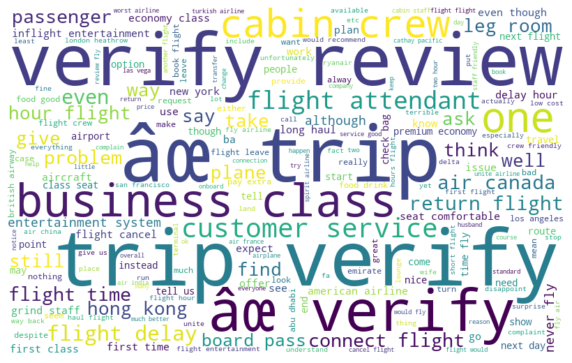

In [69]:
#### Understanding the common words used in customer reviews
all_words = ' '.join([text for text in df['review_processed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color='white').generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [70]:
#### removal of common words
other_stopwords = ['âœ', 'trip', 'verifed', 'even', 'hong kong', 'canada', 'new york', 'though', 'told', 'got', 'hong', 'kong', 'flights', 
                   'passenger', 'san francisco', 'verify', 'go']
df['review_cleaned']=df['review_processed'].apply(lambda x: " ".join(word for word in x.split() if word not in other_stopwords))

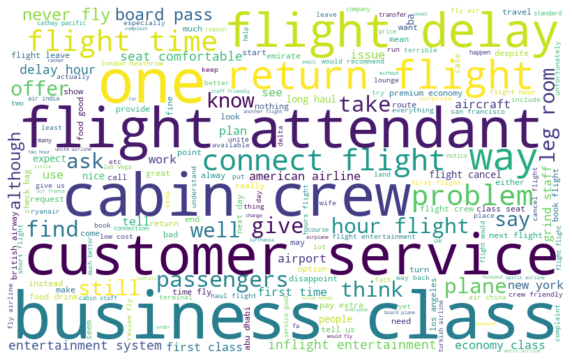

In [71]:
#### Checking the common words again in customer reviews
all_words = ' '.join([text for text in df['review_cleaned']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color='white').generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



*   **Create Document Term Matrix and wordcloud for each airline**



In [72]:
#### Group the lemmatized reviews according to the airlines
df_grouped = df[['airline','review_cleaned']].groupby(by='airline').agg(lambda x:' '.join(x))
df_grouped.head()

,review_cleaned
airline,
ANA All Nippon Airways,first time fly airline family tokyo back manil...
Adria Airways,ljubljana munich homebase airport adria airway...
Aegean Airlines,athens london heathrow gold member aegean sinc...
Aer Lingus,dublin london flight book stop another airline...
Aeroflot Russian Airlines,gatwick st petersburg years extremely lax bagg...


In [73]:
#### Create Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['review_cleaned'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head()

,aa,aaa,aaaaahhhh,aaadvantage,aaccess,aadmirals,aadvantage,aair,aairlines,aal,...,œzoneâ,œæœ,œï¼œçµ,šå,šå¾ˆå,šæ,šæˆ²,šé,ƒæ,ƒçš
airline,,,,,,,,,,,,,,,,,,,,,
ANA All Nippon Airways,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adria Airways,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aegean Airlines,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aer Lingus,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Aeroflot Russian Airlines,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#### Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import  WordCloud
from textwrap import wrap

In [75]:
#### Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

In [76]:
# Transposing document term matrix
df_dtm=df_dtm.transpose()

In [77]:
# Plotting word cloud for each airline
#for index,airline in enumerate(df_dtm.columns):
  #generate_wordcloud(df_dtm[airline].sort_values(ascending=False),airline)

In [78]:
#### removal of common words and places name from each airline review
extra_stopwords = ['tokyo', 'airline', 'munich', 'adria', 'ljubljana', 'athens', 'aegean', 'dublin', 'aer', 'moscow', 'svo', 'mexico', 'arabia', 'sharjah', 
                   'toronto', 'china', 'beijing', 'europa', 'madrid', 'paris', 'france', 'cdg', 'india', 'delhi', 'mumbai', 'del', 'auckland', 'zealand', 'bali', 
                   'alaska', 'seattle', 'rome', 'vienna', 'vie', 'bangkok', 'lumpur', 'dubai', 'kuala', 'singapore', 'london', 'ba', 'brussels', 'shanghai', 
                   'guangzhou', 'panama', 'eva', 'cairo', 'dubai', 'addis', 'ababa', 'abu', 'dhabi', 'helsinki', 'denver', 'garuda', 'jakarta', 'indonesia', 'bahrain', 
                   'gulf', 'madrid', 'iberia', 'amsterdam', 'seoul', 'kuwait', 'warsaw', 'latam', 'frankfurt', 'munich', 'istanbul', 'pegasus', 'sydney', 'doha', 'qatar', 
                   'sas', 'jeddah', 'singapore', 'johannesburg', 'zurich', 'swiss', 'lisbon', 'bucharest', 'istanbul', 'kiev']

df['review_cleaned']=df['review_cleaned'].apply(lambda x: " ".join(word for word in x.split() if word not in extra_stopwords))

We ran the code for wordcloud again to verify the changes after removal of places_stopwords



*   **Tokenization of Words**



In [79]:
from nltk.tokenize import word_tokenize

In [80]:
df['review_tokenized'] = df['review_cleaned'].apply(word_tokenize)
df['review_tokenized'].head(10)

0    [izmir, via, first, time, iâ, fly, tk, find, g...
1    [make, check, airport, take, luggage, gate, ga...
2    [prishtina, via, fly, company, several, time, ...
3    [fly, turkish, airlines, iad, ist, khi, return...
4    [via, never, book, turkish, airlines, travel, ...
5    [budapest, via, turkish, airlines, delay, flig...
6    [algiers, plan, take, pm, arrive, algiers, pm,...
7    [basel, cape, town, via, arrive, inform, cape,...
8    [luxembourg, via, auh, ist, flight, flight, co...
9    [experience, turkish, airlines, devastate, one...
Name: review_tokenized, dtype: object

# Check the polarity

In [81]:
#### Importing Text Blob for checking the polarity
from textblob import TextBlob

In [82]:
#### Create a new column with polarity
df['polarity'] = df['review_cleaned'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [83]:
df.head()

,index,airline,overall,author,review_date,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,review_processed,review_cleaned,review_tokenized,polarity
0,1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1,âœ trip verify london izmir via istanbul first...,izmir via first time iâ fly tk find good air c...,"[izmir, via, first, time, iâ, fly, tk, find, g...",0.198433
1,3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,0,âœ trip verify istanbul bucharest make check a...,make check airport take luggage gate gate surp...,"[make, check, airport, take, luggage, gate, ga...",0.116667
2,5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,0,âœ trip verify rome prishtina via istanbul fly...,prishtina via fly company several time past ye...,"[prishtina, via, fly, company, several, time, ...",0.134285
3,7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,1,âœ trip verify fly turkish airlines iad ist kh...,fly turkish airlines iad ist khi return khi is...,"[fly, turkish, airlines, iad, ist, khi, return...",0.448718
4,9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,0,âœ trip verify mumbai dublin via istanbul neve...,via never book turkish airlines travel flight ...,"[via, never, book, turkish, airlines, travel, ...",0.200000


In [84]:
df['polarity'].describe()

count    64440.000000
mean         0.150578
std          0.210504
min         -1.000000
25%          0.018056
50%          0.150758
75%          0.289394
max          1.000000
Name: polarity, dtype: float64

# Aspect Classification

In [85]:
#df.loc[0,'customer_review']

In [86]:
#df['review_tokenized'].loc[df['Aspect']==''][11:20]

In [87]:
#### Read individual verbatim to analyze words and classify according to aspects
df.loc[47541,'review_tokenized']

['review',
 'fly',
 'cathay',
 'pacific',
 'flight',
 'suvarnabhumi',
 'airport',
 'economy',
 'class',
 'overbooked',
 'quite',
 'impress',
 'upgrade',
 'business',
 'class',
 'free',
 'equip',
 'regional',
 'business',
 'class',
 'cabin',
 'general',
 'quite',
 'enjoyable',
 'flight',
 'room',
 'improvement',
 'variety',
 'music',
 'add']

In [88]:
def aspect(x):
  rs=''
  if (('experience' in x) or ('overall' in x) or ('helpful' in x) or ('good' in x) or ('everything' in x)):
    rs='Overall Experience'
  if (('customer' in x and 'service' in x) or ('rude' in x) or ('service' in x) or ('contact' in x) or ('agents' in x) or 
     ('call' in x)):
    rs='Customer Service'
  if (('refund' in x)):
    rs='Policies'
  if (('delay' in x) or ('late' in x) or ('reschedule' in x and 'flight' in x) or ('cancel' in x and 'flight' in x) or 
     ('overbooked' in x)):
    rs= 'Flight Management'
  if (('baggage' in x) or ('bag' in x) or ('luggage' in x)):
    rs='Baggage Policy'
  if (('entertainment' in x)):
    rs='In-Flight Entertainment'
  if (('food' in x) or ('beverages' in x) or ('delicious' in x) or ('drink' in x) or ('meals' in x) or ('dinner' in x) or 
     ('meal' in x)):
    rs='F&B'
  if (('leg' in x) or ('legroom' in x) or ('seat' in x)):
    rs='Seat Comfort'
  if (('ground' in x ) or ('counter' in x) or ('terminal' in x) or ('staff' in x) or ('check' in x)):
    rs='Ground Service'
  if (('cabin' in x and 'crew' in x) or ('cabin' in x) or ('dirty' in x) or ('clean' in x)):
    rs='Cabin Service'
  
  

  return rs

In [89]:
#### Adding aspects column 
df['Aspect']=df['review_tokenized'].apply(aspect)

In [90]:
df['Aspect'].value_counts()

Ground Service             21795
Cabin Service              18919
Seat Comfort               11378
F&B                         4042
Flight Management           3735
Baggage Policy              1629
Customer Service            1327
                             744
Overall Experience           438
In-Flight Entertainment      305
Policies                     128
Name: Aspect, dtype: int64

In [91]:
#### To test random aspects
df['customer_review'].loc[df['Aspect']=='Booking Management']

Series([], Name: customer_review, dtype: object)

In [92]:
df.loc[47541,'customer_review']

'âœ… Verified Review | Flew on Cathay Pacific flight from Singapore to Bangkok Suvarnabhumi Airport. The economy class was overbooked and I was quite impressed that I was upgraded to business class for free. This A330 is equipped with regional business class cabin. In general it was quite an enjoyable flight. The only room of improvement is that more variety of music should be added.'

In [93]:
df.shape

(64440, 20)

In [94]:
df['Aspect'].replace({'':'Needs Manual Analysis'},inplace=True)

In [95]:
df['Aspect'].value_counts()

Ground Service             21795
Cabin Service              18919
Seat Comfort               11378
F&B                         4042
Flight Management           3735
Baggage Policy              1629
Customer Service            1327
Needs Manual Analysis        744
Overall Experience           438
In-Flight Entertainment      305
Policies                     128
Name: Aspect, dtype: int64

# Division into Training and Test Dataset

In [96]:
df.head()

,index,airline,overall,author,review_date,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,review_processed,review_cleaned,review_tokenized,polarity,Aspect
0,1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1,âœ trip verify london izmir via istanbul first...,izmir via first time iâ fly tk find good air c...,"[izmir, via, first, time, iâ, fly, tk, find, g...",0.198433,Cabin Service
1,3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,0,âœ trip verify istanbul bucharest make check a...,make check airport take luggage gate gate surp...,"[make, check, airport, take, luggage, gate, ga...",0.116667,Ground Service
2,5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,0,âœ trip verify rome prishtina via istanbul fly...,prishtina via fly company several time past ye...,"[prishtina, via, fly, company, several, time, ...",0.134285,Ground Service
3,7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,1,âœ trip verify fly turkish airlines iad ist kh...,fly turkish airlines iad ist khi return khi is...,"[fly, turkish, airlines, iad, ist, khi, return...",0.448718,Cabin Service
4,9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,0,âœ trip verify mumbai dublin via istanbul neve...,via never book turkish airlines travel flight ...,"[via, never, book, turkish, airlines, travel, ...",0.200000,Flight Management


In [97]:
df['tokens_processed']=df['review_tokenized'].apply(str)

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [99]:
vectorizer = TfidfVectorizer(max_features=7000)
tfidf_model = vectorizer.fit_transform(df['tokens_processed']).toarray()
print(tfidf_model)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [100]:
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

In [101]:
# X -> features, y -> label 
X = tfidf_model
y = df['Aspect']

In [102]:

y_lg=df.recommended.values

In [103]:
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [107]:
y_lg_train, y_lg_test = train_test_split (y_lg, test_size=0.3, random_state=5)

# Logistic Regression for Customer Review and Recommendation

In [108]:
print("Vocabulary size: {}".format(len(vectorizer.vocabulary_)))
print("X_train:\n{}".format(repr(X_train)))
print("X_test: \n{}".format(repr(X_test)))

feature_names = vectorizer.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

Vocabulary size: 7000
X_train:
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
X_test: 
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Number of features: 7000


## ***Tuning the Parameters***

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

In [110]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1, verbose=10)
grid.fit(X_train, y_lg_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed: 23.1min remaining:  4.4min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 30.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [111]:
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.91
Best parameters:  {'C': 1}
Best estimator:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [112]:
!pip install mglearn

In [113]:
import mglearn

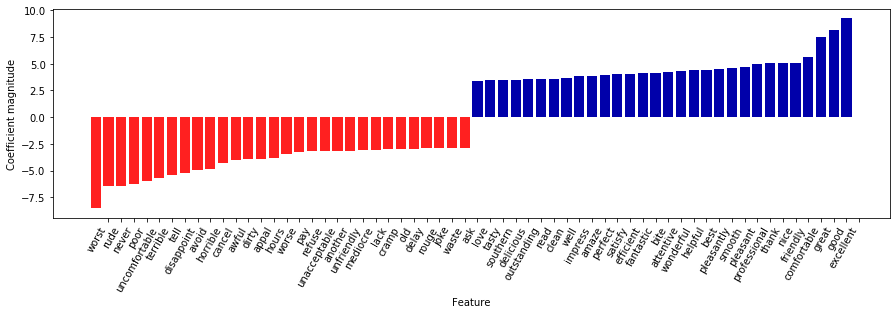

In [114]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, feature_names, n_top_features=30)
plt.show()

## ***Fitting the Logistic Regression Model***

In [115]:
lr = grid.best_estimator_
lr.fit(X_train, y_lg_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
lr.predict(X_test)
print("Score: {:.2f}".format(lr.score(X_test, y_lg_test)))

Score: 0.91


## ***Model Evaluation using Confusion Matrix***

In [120]:
y_pred=lr.predict(X_test)

In [122]:
cnf_matrix = metrics.confusion_matrix(y_lg_test, y_pred)
cnf_matrix

array([[9341,  803],
       [ 969, 8219]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

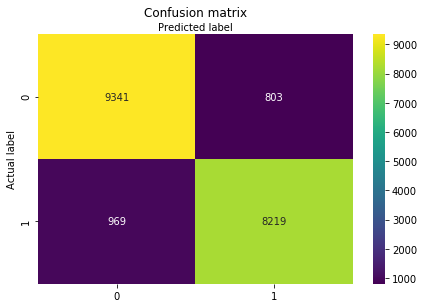

In [124]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## ***Confusion Matrix Evaluation Metrics***

In [125]:
print("Accuracy:",metrics.accuracy_score(y_lg_test, y_pred))
print("Precision:",metrics.precision_score(y_lg_test, y_pred))
print("Recall:",metrics.recall_score(y_lg_test, y_pred))

Accuracy: 0.9083385061038692
Precision: 0.910995344712924
Recall: 0.8945363517631694


## ***ROC Curve***

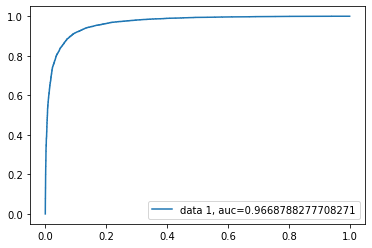

In [127]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_lg_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_lg_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Modelling

In [185]:
#Classifier imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

from sklearn.metrics import classification_report
from sklearn import metrics

In [186]:
# Initialize our classifiers
MNB = MultinomialNB()
LSVC = LinearSVC(verbose=10,random_state=9)
gnb = GaussianNB()
BNB = BernoulliNB()
LR = LogisticRegression()
SDG = SGDClassifier()
#SVC = SVC()
NSVC = NuSVC()
KNN = KNeighborsClassifier(n_neighbors=1,n_jobs=-1)

# Naive Bayes Classifier

In [187]:
MNB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [188]:
y_trainpred = MNB.predict(X_train)

In [189]:
print(classification_report(y_train,y_trainpred))

                         precision    recall  f1-score   support

         Baggage Policy       0.33      0.00      0.01      1154
          Cabin Service       0.53      0.85      0.65     13296
       Customer Service       0.25      0.00      0.00       923
                    F&B       0.88      0.01      0.01      2833
      Flight Management       0.78      0.20      0.32      2640
         Ground Service       0.52      0.70      0.59     15167
In-Flight Entertainment       0.00      0.00      0.00       210
  Needs Manual Analysis       1.00      0.00      0.00       509
     Overall Experience       0.00      0.00      0.00       306
               Policies       0.00      0.00      0.00        98
           Seat Comfort       0.78      0.22      0.34      7972

               accuracy                           0.54     45108
              macro avg       0.46      0.18      0.17     45108
           weighted avg       0.59      0.54      0.47     45108



In [190]:
metrics.accuracy_score(y_train,y_trainpred)

0.5371996098253081

In [191]:
y_pred = MNB.predict(X_test)

In [192]:
print(classification_report(y_test,y_pred))

                         precision    recall  f1-score   support

         Baggage Policy       0.33      0.00      0.00       475
          Cabin Service       0.51      0.85      0.63      5623
       Customer Service       0.00      0.00      0.00       404
                    F&B       0.50      0.00      0.00      1209
      Flight Management       0.61      0.13      0.21      1095
         Ground Service       0.51      0.68      0.58      6628
In-Flight Entertainment       0.00      0.00      0.00        95
  Needs Manual Analysis       0.00      0.00      0.00       235
     Overall Experience       0.00      0.00      0.00       132
               Policies       0.00      0.00      0.00        30
           Seat Comfort       0.72      0.18      0.29      3406

               accuracy                           0.52     19332
              macro avg       0.29      0.17      0.16     19332
           weighted avg       0.52      0.52      0.45     19332



In [193]:
metrics.accuracy_score(y_test,y_pred)

0.5179495137595697

# Linear SVC

In [194]:
LSVC.fit(X_train, y_train)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=9, tol=0.0001,
          verbose=10)

In [195]:
y_trainpred=LSVC.predict(X_train)
print(classification_report(y_train,y_trainpred))

                         precision    recall  f1-score   support

         Baggage Policy       0.98      0.98      0.98      1154
          Cabin Service       1.00      0.99      0.99     13296
       Customer Service       1.00      0.99      0.99       923
                    F&B       0.99      0.98      0.98      2833
      Flight Management       0.96      1.00      0.98      2640
         Ground Service       0.99      0.99      0.99     15167
In-Flight Entertainment       1.00      1.00      1.00       210
  Needs Manual Analysis       1.00      0.99      1.00       509
     Overall Experience       1.00      0.99      1.00       306
               Policies       1.00      0.98      0.99        98
           Seat Comfort       0.99      0.99      0.99      7972

               accuracy                           0.99     45108
              macro avg       0.99      0.99      0.99     45108
           weighted avg       0.99      0.99      0.99     45108



In [196]:
metrics.accuracy_score(y_train,y_trainpred)

0.990755520085129

In [197]:
y_pred = LSVC.predict(X_test)

In [198]:
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

         Baggage Policy       0.76      0.66      0.70       475
          Cabin Service       1.00      0.98      0.99      5623
       Customer Service       0.65      0.55      0.60       404
                    F&B       0.82      0.81      0.81      1209
      Flight Management       0.75      0.89      0.81      1095
         Ground Service       0.96      0.97      0.97      6628
In-Flight Entertainment       0.91      0.31      0.46        95
  Needs Manual Analysis       0.61      0.41      0.49       235
     Overall Experience       0.76      0.21      0.33       132
               Policies       0.40      0.13      0.20        30
           Seat Comfort       0.89      0.95      0.92      3406

               accuracy                           0.92     19332
              macro avg       0.77      0.62      0.66     19332
           weighted avg       0.92      0.92      0.92     19332



In [199]:
metrics.accuracy_score(y_test,y_pred)

0.9232360852472584

In [200]:
from sklearn.preprocessing import StandardScaler

In [201]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [ ]:
lin_clf = LinearSVC(random_state=9)
lin_clf.fit(X_train_scaled, y_train)

In [ ]:
y_trainpred = lin_clf.predict(X_train_scaled)
print(classification_report(y_train, y_trainpred))


In [ ]:
metrics.accuracy_score(y_train, y_trainpred)

In [ ]:
y_pred = lin_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

In [ ]:
metrics.accuracy_score(y_test, y_pred)